# Bolygómű vizsgálata

Vizsgáljuk meg azt $R$ sugarú kör belsejében gördülő kisebb, $r$ sugarú korong mozgását!
- a) Írjuk fel a mozgástörvényét a belső kör egy tetszőleges $\mathrm{P}$ pontjának ($\mathbf{r}_P$,$\mathbf{v}_P$,$\mathbf{a}_P$)!
- b) Tegyük meg ezt relatív kinematikával is!

**Megoldás:**

Bolygómű egyszerűsített modellje (lsd. Gépelemek): fogazat elhagyása, csúszásmentes gördülés. 

Elemek: hajtó elem (kar: 2-es test), hajtott elem (bolygókerék: 1-es test), rögzített külső elem (gyűrűkerék: 0-ás test). (Napkerék nincs modellezve.)

<img src="./alk3_bolygomu_abra1.pdf" style="width: 300px;">

**a) Megoldás abszolút kinematikával:**

<img src="./alk3_bolygomu_abra2.pdf" style="width: 420px;">


A kart elhagyjuk, az origó ($\mathrm{O}$) és a belső (gördülő) kör középpontja között ($\mathrm{A}$) értelmezzük a $\varphi$ szöget a függőlegessel bezárólag. Adott $\varphi$ szögelfordulás esetén a kis kerék is forog a saját tengelye körül: $\chi$ szögelfordulás. Kapcsolat $\varphi$ és $\chi$ között a tiszta gördülés következtében (levezetés a mellékelt dokumentumban):


$$\chi = \frac{R}{r}\varphi.$$

Írjuk fel a $\mathrm{P}$ pont helyvektorát az $\mathrm{O}$ középpontú $xyz$ koordináta-rendszerben: 


$$\mathbf{r}_{OP}(t) = \mathbf{r}_{OA}(t)+\mathbf{r}_{AP}(t) = \begin{bmatrix}(R-r)\sin\varphi(t)\\-(R-r)\cos\varphi(t)\\0\end{bmatrix} + \begin{bmatrix} -r\sin{(\chi(t)-\varphi(t))}\\-r\cos{(\chi(t)-\varphi(t))} \\ 0 \end{bmatrix}.$$


Az időfüggés a későbbiekben el lesz hagyva, valamint innentől $\mathbf{r}_{OP} \equiv \mathbf{r}_{P} $.

In [1]:
import sympy as sp # szokásos
import numpy as np # numerikus, gyors számításokhoz
import matplotlib.pyplot as plt # animáció megjelenítéséhez
import matplotlib.animation as animation # animáció készítéséhez


sp.init_printing() # a szép kiíratásért, de lassítja a futást

R,r,t = sp.symbols('R,r,t') # használt szimbólumok
φ = sp.Function('φ')(t) # az idő függvényei, szeretnénk őket deriválni
χ = sp.Function('χ')(t)

rOA = sp.Matrix([(R-r)*sp.sin(φ),-(R-r)*sp.cos(φ),0]) # sympy mátrix objektum létrehozása
rAP = sp.Matrix([-r*sp.sin(χ-φ),-r*sp.cos(χ-φ),0])
rOP = rOA+rAP
rOP

⎡ r⋅sin(φ(t) - χ(t)) + (R - r)⋅sin(φ(t)) ⎤
⎢                                        ⎥
⎢-r⋅cos(φ(t) - χ(t)) + (-R + r)⋅cos(φ(t))⎥
⎢                                        ⎥
⎣                   0                    ⎦

A $\mathrm{P}$ pont (pillanatyni) sebessége az $\mathbf{r}_{P}(t)$ helyvektorának idő szerinti deriváltja:

$$\mathbf{v}_P(t) = \dot{\mathbf{r}}_P(t).$$

In [2]:
# Helyettesítsünk be χ helyére a φ-vel való összefüggését:
rOP_φ = rOP.subs([(χ,R/r*φ)])

# Idő szerinti egyszeres deriválás:
vOP = rOP_φ.diff(t)

vOP = vOP.applyfunc(sp.simplify) # így lehet egy mátrix minden elemét külön-külön egyszerűsíteni
vOP

⎡        ⎛     ⎛⎛R    ⎞     ⎞            ⎞ d       ⎤
⎢(R - r)⋅⎜- cos⎜⎜─ - 1⎟⋅φ(t)⎟ + cos(φ(t))⎟⋅──(φ(t))⎥
⎢        ⎝     ⎝⎝r    ⎠     ⎠            ⎠ dt      ⎥
⎢                                                  ⎥
⎢         ⎛   ⎛⎛R    ⎞     ⎞            ⎞ d        ⎥
⎢ (R - r)⋅⎜sin⎜⎜─ - 1⎟⋅φ(t)⎟ + sin(φ(t))⎟⋅──(φ(t)) ⎥
⎢         ⎝   ⎝⎝r    ⎠     ⎠            ⎠ dt       ⎥
⎢                                                  ⎥
⎣                        0                         ⎦

In [3]:
# A gyorsulás (ez kézzel már munkás):
aOP = rOP_φ.diff(t,2)
aOP = aOP.applyfunc(sp.simplify) # időigényes számítás
aOP

⎡        ⎛  ⎛                      2                       2                  
⎢        ⎜  ⎜            ⎛d       ⎞       ⎛⎛R    ⎞     ⎞  d                   
⎢(R - r)⋅⎜r⋅⎜- sin(φ(t))⋅⎜──(φ(t))⎟  - cos⎜⎜─ - 1⎟⋅φ(t)⎟⋅───(φ(t)) + cos(φ(t))
⎢        ⎜  ⎜            ⎝dt      ⎠       ⎝⎝r    ⎠     ⎠   2                  
⎢        ⎝  ⎝                                            dt                   
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                r            
⎢                                                                             
⎢         ⎛  ⎛                    2                     2                     
⎢         ⎜  ⎜   ⎛⎛R    ⎞     ⎞  d                     d                    ⎛d
⎢ (R - r)⋅⎜r⋅⎜sin⎜⎜─ - 1⎟⋅φ(t)⎟⋅───(φ(t)) + sin(φ(t))⋅───(φ(t)) + cos(φ(t))⋅⎜─
⎢         ⎜  ⎜   ⎝⎝r    ⎠     ⎠   2                     2                   ⎝d
⎢         ⎝  ⎝                  dt                  

Hogyan is lehet értelmezni $\varphi$ és $\chi$ szögeket, valamint az ő idő szerinti deriváltjaikat (szögsebesség és szöggyorsulás)? 

Illesszünk be egy hajtókart az ábrába, amely az $\mathrm{O}$ pontot és az $\mathrm{A}$ pontot köti össze. Ennek a szögelfordulása, szögsebessége és szöggyorsulása lesz $\varphi,\dot\varphi,\ddot\varphi$ a rögzített $xyz$ koordináta-rendszerhez képest:
$$\dot\varphi = \omega_{20}, \quad \ddot\varphi = \varepsilon_{20}.$$

$\chi$ a kis kerék saját tengelye kürül történő elfordulás, azaz ennek deriváltja és kétszeres deriváltja a relatív szögsebességét és szöggyorsulását adja meg a hajtókarhoz rögzített $\xi\eta\zeta$ koordináta-rendszerhez képest, azaz:
$$ \dot\chi = \omega_{12}, \quad \ddot\chi = \varepsilon_{12}.$$

<img src="./alk3_bolygomu_abra1.pdf" style="width: 300px;">


Helyettesítsük be ezeket a fenti erdedményekbe:

In [4]:
ω20,ε20 = sp.symbols('ω_20,ε_20') # \varepsilon + tab
vOP_ω = vOP.subs([(φ.diff(t),ω20)]) # a deriváltak helyére ω és ε
vOP_ω

⎡            ⎛     ⎛⎛R    ⎞     ⎞            ⎞⎤
⎢ω₂₀⋅(R - r)⋅⎜- cos⎜⎜─ - 1⎟⋅φ(t)⎟ + cos(φ(t))⎟⎥
⎢            ⎝     ⎝⎝r    ⎠     ⎠            ⎠⎥
⎢                                             ⎥
⎢             ⎛   ⎛⎛R    ⎞     ⎞            ⎞ ⎥
⎢ ω₂₀⋅(R - r)⋅⎜sin⎜⎜─ - 1⎟⋅φ(t)⎟ + sin(φ(t))⎟ ⎥
⎢             ⎝   ⎝⎝r    ⎠     ⎠            ⎠ ⎥
⎢                                             ⎥
⎣                      0                      ⎦

In [5]:
# Hasonlóan a gyorsulással:
aOP_ε = aOP.subs([(φ.diff(t,2),ε20),(φ.diff(t),ω20)])
aOP_ε

⎡        ⎛  ⎛         ⎛⎛R    ⎞     ⎞                      2          ⎞      2 
⎢(R - r)⋅⎜r⋅⎜- ε₂₀⋅cos⎜⎜─ - 1⎟⋅φ(t)⎟ + ε₂₀⋅cos(φ(t)) - ω₂₀ ⋅sin(φ(t))⎟ + ω₂₀ ⋅
⎢        ⎝  ⎝         ⎝⎝r    ⎠     ⎠                                 ⎠        
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                   r                         
⎢                                                                             
⎢         ⎛  ⎛       ⎛⎛R    ⎞     ⎞                      2          ⎞      2  
⎢ (R - r)⋅⎜r⋅⎜ε₂₀⋅sin⎜⎜─ - 1⎟⋅φ(t)⎟ + ε₂₀⋅sin(φ(t)) + ω₂₀ ⋅cos(φ(t))⎟ + ω₂₀ ⋅(
⎢         ⎝  ⎝       ⎝⎝r    ⎠     ⎠                                 ⎠         
⎢ ────────────────────────────────────────────────────────────────────────────
⎢                                                   r                         
⎢                                                                             
⎣                                                   

$\mathbf{r}_P$,$\mathbf{v}_P$,$\mathbf{a}_P$ tehát adott, így a mozgástörvénye ismert a $\mathrm{P}$ pontnak. 

**b) Megoldás relatív kinematikával**

A mozgás áll egy origó körüli forgásból, valamint még a kis kerék is forog egy, az eredeti forgáshoz képesti relatív szögsebességgel és szöggyorsulással.

Két koordináta-rendszer vehető fel: az $\mathrm{O}$ kp-ú $xyz$ álló: $\mathrm{O}(xyz)$, valamint az $\mathrm{\Omega}$ kp-ú, de a hajtott rúddal együtt forgó: $\Omega(\xi\eta\zeta)$. Jelen esetben $\mathrm{O}\equiv\Omega$.

Az ismert képletből:
$$\mathbf{v}_{P10} = \mathbf{v}_{P20} + \mathbf{v}_{P12} = \mathbf{v}_O + \boldsymbol{\omega}_{20}\times \mathbf{r}_{OP} + \mathbf{v}_A + \boldsymbol{\omega}_{12}\times \mathbf{r}_{AP}. $$

Tiszta gördülés miatt a kontaktpont sebessége zérus vektor, ezt felhasználva (mellékelt levezetésben részletesen elmagyarázva):

$$\omega_{12} = \frac{R}{r}\omega_{20}.$$

In [6]:
# A sebesség kiszámítása tehát most nem a helyvektor deriválásával történik, hanem a redukciós képlettel.
vO = sp.Matrix([0,0,0]) # tartósan álló pont az absz. krsz-ben
vA = sp.Matrix([0,0,0]) # tartósan álló pont a relatív (forgó) krsz-ben

ω12 = sp.Symbol('ω_12') # ez még kell
ω20_vect = sp.Matrix([0,0,ω20])
ω12_vect = sp.Matrix([0,0,-ω12])

# r_OP és r_AP már fent ki van számolva

vP10 = vO + ω20_vect.cross(rOP) + vA + ω12_vect.cross(rAP)
vP10

⎡-r⋅ω₁₂⋅cos(φ(t) - χ(t)) - ω₂₀⋅(-r⋅cos(φ(t) - χ(t)) + (-R + r)⋅cos(φ(t)))⎤
⎢                                                                        ⎥
⎢ -r⋅ω₁₂⋅sin(φ(t) - χ(t)) + ω₂₀⋅(r⋅sin(φ(t) - χ(t)) + (R - r)⋅sin(φ(t))) ⎥
⎢                                                                        ⎥
⎣                                   0                                    ⎦

In [7]:
# Helyettesítsük be az összefüggést a két szögsebesség között, valamint az összefüggés integráltját is.
vP10_ω = vP10.subs([(ω12,R/r*ω20),(χ,R/r*φ)])
vP10_ω = vP10_ω.applyfunc(sp.simplify)

In [8]:
(vOP_ω-vP10_ω).applyfunc(sp.simplify) # ugyanazt kaptuk absz. kinematikával és rel. kinematikával is

A gyorsulás az ismert formula szerint:
$$\mathbf{a}_{P10} = \mathbf{a}_{P20} + \mathbf{a}_{P12} + \mathbf{a}_{Pcor}.$$

$\mathbf{a}_{P20}$ és $\mathbf{a}_{P12}$ gyorsulásredukciós képlettel számolható, $\mathbf{a}_{Pcor}$ pedig pusztán a sebességállapottól függ:

$$\mathbf{a}_{P20} = \mathbf{a}_O + \boldsymbol{\varepsilon}_{20}\times \mathbf{r}_{OP}-\omega^2_{20}\mathbf{r}_{OP},$$

$$\mathbf{a}_{P12} = \mathbf{a}_A + \boldsymbol{\varepsilon}_{12}\times \mathbf{r}_{AP}-\omega^2_{12}\mathbf{r}_{AP},$$

$$\mathbf{a}_{Pcor} = 2\boldsymbol{\omega}_{20}\times\mathbf{v}_{P12}.$$

In [9]:
aO = sp.Matrix([0,0,0]) # tartósan álló pont
aA = sp.Matrix([0,0,0]) # a forgó krsz-hez képest tartósan álló pont

ε20,ε12 = sp.symbols('ε_20,ε_12')
ε20_vect = sp.Matrix([0,0,ε20])
ε12_vect = sp.Matrix([0,0,-ε12])

aP10 = aO + ε20_vect.cross(rOP) - ω20**2*rOP + aA + ε12_vect.cross(rAP) - ω12**2*rAP \
       + 2*ω20_vect.cross(ω12_vect.cross(rAP))

# Helyettesítsük be a sugarak arányából következő kapcsolódó mennyiségeket, valamint a deriváltakat:
aP10_ε = aP10.subs([(ω12,R/r*ω20),(χ,R/r*φ),(ε12,R/r*ε20)])

In [10]:
aP10_ε.applyfunc(sp.simplify) # Érdekes, hogy nem tudja tovább egyszerűsíteni

⎡ 2    2    ⎛⎛R    ⎞     ⎞     ⎛           ⎛⎛R    ⎞     ⎞          2    ⎛⎛R   
⎢R ⋅ω₂₀ ⋅sin⎜⎜─ - 1⎟⋅φ(t)⎟ + r⋅⎜- R⋅ε₂₀⋅cos⎜⎜─ - 1⎟⋅φ(t)⎟ - 2⋅R⋅ω₂₀ ⋅sin⎜⎜─ - 
⎢           ⎝⎝r    ⎠     ⎠     ⎝           ⎝⎝r    ⎠     ⎠               ⎝⎝r   
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢  2    2    ⎛⎛R    ⎞     ⎞     ⎛         ⎛⎛R    ⎞     ⎞          2    ⎛⎛R    
⎢ R ⋅ω₂₀ ⋅cos⎜⎜─ - 1⎟⋅φ(t)⎟ + r⋅⎜R⋅ε₂₀⋅sin⎜⎜─ - 1⎟⋅φ(t)⎟ - 2⋅R⋅ω₂₀ ⋅cos⎜⎜─ - 1
⎢            ⎝⎝r    ⎠     ⎠     ⎝         ⎝⎝r    ⎠     ⎠               ⎝⎝r    
⎢ ────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎣                                                   

In [11]:
aOP_ε

⎡        ⎛  ⎛         ⎛⎛R    ⎞     ⎞                      2          ⎞      2 
⎢(R - r)⋅⎜r⋅⎜- ε₂₀⋅cos⎜⎜─ - 1⎟⋅φ(t)⎟ + ε₂₀⋅cos(φ(t)) - ω₂₀ ⋅sin(φ(t))⎟ + ω₂₀ ⋅
⎢        ⎝  ⎝         ⎝⎝r    ⎠     ⎠                                 ⎠        
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                   r                         
⎢                                                                             
⎢         ⎛  ⎛       ⎛⎛R    ⎞     ⎞                      2          ⎞      2  
⎢ (R - r)⋅⎜r⋅⎜ε₂₀⋅sin⎜⎜─ - 1⎟⋅φ(t)⎟ + ε₂₀⋅sin(φ(t)) + ω₂₀ ⋅cos(φ(t))⎟ + ω₂₀ ⋅(
⎢         ⎝  ⎝       ⎝⎝r    ⎠     ⎠                                 ⎠         
⎢ ────────────────────────────────────────────────────────────────────────────
⎢                                                   r                         
⎢                                                                             
⎣                                                   

In [12]:
(aP10_ε-aOP_ε).applyfunc(sp.simplify) # ugyanazt kaptuk!

**Készítsünk animációt, és vizsgáljuk a $\mathrm{P}$ pont által leírt pályát!**

A feladathoz szükségünk lesz a $\mathrm{P}$ anyagi pont mozgástörvényére (helyvektorára) az abszolút koordináta-rendszerben.

In [13]:
rOP_φ # itt már χ-től nem függ, mert behelyettesítettük az összefüggést φ és χ között

⎡       ⎛R⋅φ(t)       ⎞                     ⎤
⎢- r⋅sin⎜────── - φ(t)⎟ + (R - r)⋅sin(φ(t)) ⎥
⎢       ⎝  r          ⎠                     ⎥
⎢                                           ⎥
⎢       ⎛R⋅φ(t)       ⎞                     ⎥
⎢- r⋅cos⎜────── - φ(t)⎟ + (-R + r)⋅cos(φ(t))⎥
⎢       ⎝  r          ⎠                     ⎥
⎢                                           ⎥
⎣                     0                     ⎦

Tételezzük fel, hogy a hajtókart állandó $\omega_{20}$ szögsebességgel hajtjuk. Ekkor 

$$\varphi(t) = \omega_{20}t.$$


In [14]:
# Helyettesítsük be φ helyére a fenti összefüggést:
rOP_ωt = rOP_φ.subs([(φ,ω20*t)])
rOP_ωt

# Hagyjuk el a z koordinátát, arra csak a keresztszorzás miatt volt szükség:
rOP_ωt.row_del(2) # .row_del tagfüggvény: kitörli a mátrix adott sorát, és helyben módosítja azt
rOP_ωt

#Ez egy görbe paraméteres egyenlete, ahol t, mint idő a paraméter, a többi szimbólum adat.

⎡       ⎛R⋅t⋅ω₂₀        ⎞                      ⎤
⎢- r⋅sin⎜─────── - t⋅ω₂₀⎟ + (R - r)⋅sin(t⋅ω₂₀) ⎥
⎢       ⎝   r           ⎠                      ⎥
⎢                                              ⎥
⎢       ⎛R⋅t⋅ω₂₀        ⎞                      ⎥
⎢- r⋅cos⎜─────── - t⋅ω₂₀⎟ + (-R + r)⋅cos(t⋅ω₂₀)⎥
⎣       ⎝   r           ⎠                      ⎦

In [15]:
rPx = rOP_ωt[0] # ne kezeljük tovább vektorként
rPy = rOP_ωt[1]

# Az animációhoz írjuk át őket numpyba, hogy gyorsabb legyen a kiértékelés numerikus adatokkal. Erre vannak 
# automatikus módszerek, pl `lamdify`, de ebbe bonyolult lenne most belemenni.
def pont_koordinata(R,r,ω,t,α = 1):

    x = -α*r*np.sin(R*t*ω/r-t*ω)+(R-r)*np.sin(t*ω) # ez az `rPx`
    y = -α*r*np.cos(R*t*ω/r-t*ω)+(-R+r)*np.cos(t*ω) # ez az `rPy`
    
    # Az `α` paraméter jelentősége később.
    return x, y

# Próbáljuk ki:
pont_koordinata(10,2,0.1,0) # x,y koordináta 

In [16]:
# Egy előre megadott t időpillanatig visszaad egy listát, amelyben a görbe pontjainak koordinátái vannak.
# Erre azért van szükség, hogy "csíkot húzzon" a P pont.
def gorbe_palya(R,r,ω,t,α = 1):
    
    δt = 0.1
    x = []
    y = []
    n = round(t/δt) # Ennyi db. pontot kapunk vissza t időpontig
    
    for i in range(n):
        # Ebben a for loopban az i értéke változik ciklusról-ciklusra!
        xn, yn = pont_koordinata(R,r,ω,i*δt,α)
        x.append(xn)
        y.append(yn)
    
    return x, y

#Próbáljuk ki:
gorbe_palya(10,2,0.1,0.3) # 3 pont pár: x1-y1; x2-y2; x3-y3

<IPython.core.display.Javascript object>


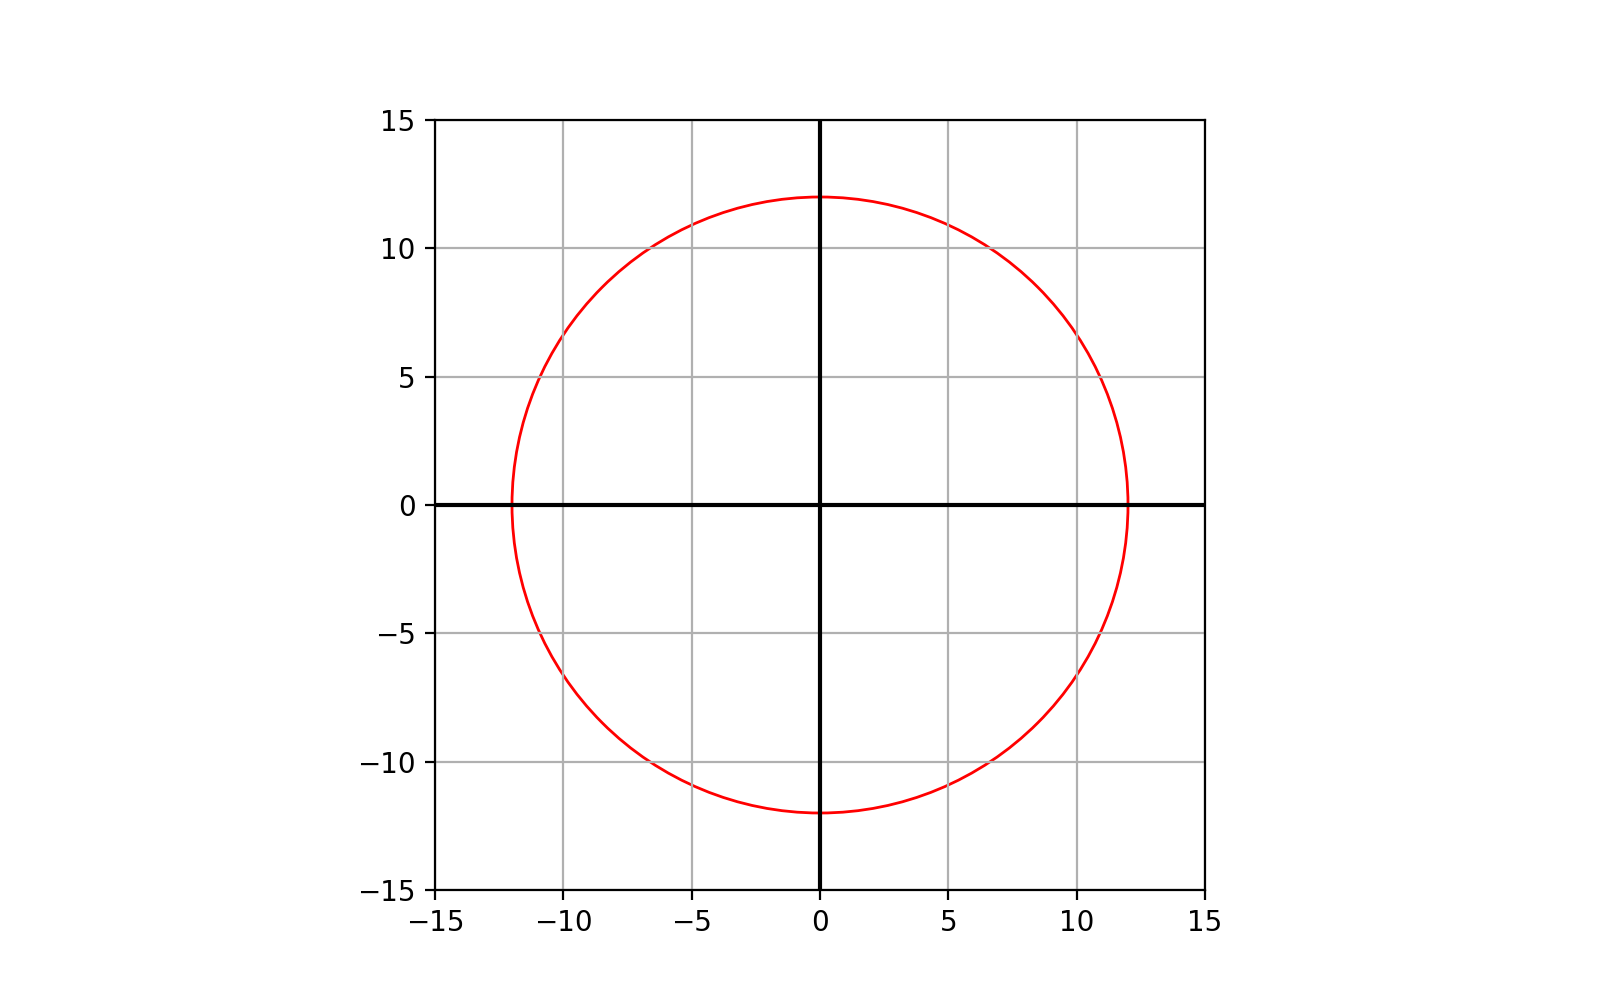

In [17]:
%matplotlib nbagg 
#azért kell, hogy jól működjön az animáció

fig = plt.figure(figsize=(8,5)) # mekkora legyen az ábra -> ki kell tapasztalni

ax = plt.axes()
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
ax.set_aspect('equal')
ax.grid(True)

# Ki lehet emelni a tengelyeket
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# Inicializáljuk a görbét, a kiskört, a P pontot és a forgó kart: ezek fognak mozogni az animáció közben
gorbe, = ax.plot([],[]) # a `,` a név után egy rövidítés: olyan mintha azt írnánk: `gorbe = ax.plot([],[])[0]`
kiskor, = ax.plot([],[])
potty, = ax.plot([],[],'ro')
kar, = ax.plot([],[],'o-',lw = 5)

def forgo_kor(R,r,ω,t):
    
    x = []
    y = []
    
    for i in range(51):
        # Ebben a for loopban az i értéke változik ciklusról-ciklusra!
        xn = (R-r)*np.sin(ω*t)+ np.cos(i*2*np.pi/50)*r
        yn = -(R-r)*np.cos(ω*t) + np.sin(i*2*np.pi/50)*r
        x.append(xn)
        y.append(yn)
    
    return x, y

def kar_koordinata(R,r,ω,t):
    
    x = (R-r)*np.sin(ω*t)
    y = -(R-r)*np.cos(ω*t)
    
    return [0,x], [0,y]

def animacio(t,R,r,ω,α):
    # A matplotlib animáló parancsába kell majd beadjuk ezt a függvényt
    # Alapvetően egy darab változót fogadhat, amit az animátor parancs léptet majd (idő), de megoldható a több
    
    x,y = gorbe_palya(R,r,ω,t,α)
    gorbe.set_data(x,y)
    x,y = forgo_kor(R,r,ω,t)
    kiskor.set_data(x,y)
    x,y = pont_koordinata(R,r,ω,t,α)
    potty.set_data(x,y)
    x,y = kar_koordinata(R,r,ω,t)
    kar.set_data(x,y)
    return gorbe,kiskor,potty,kar

R_dat = 12
r_dat = 2
ω_dat = 0.04
α_dat = 1 

# Az `animacio` fv. első argumentuma kivételével (ami kötelezően a léptetett) 
# a többit az fargs-ban kell megadni
ani = animation.FuncAnimation(fig, animacio, frames=158, interval=40,fargs=(R_dat,r_dat,ω_dat,α_dat))

circle1 = plt.Circle((0, 0), R_dat, color='r', fill = False) # külső kör: statikus
ax.add_artist(circle1)

#Megjelenítjük
plt.show()

<IPython.core.display.Javascript object>


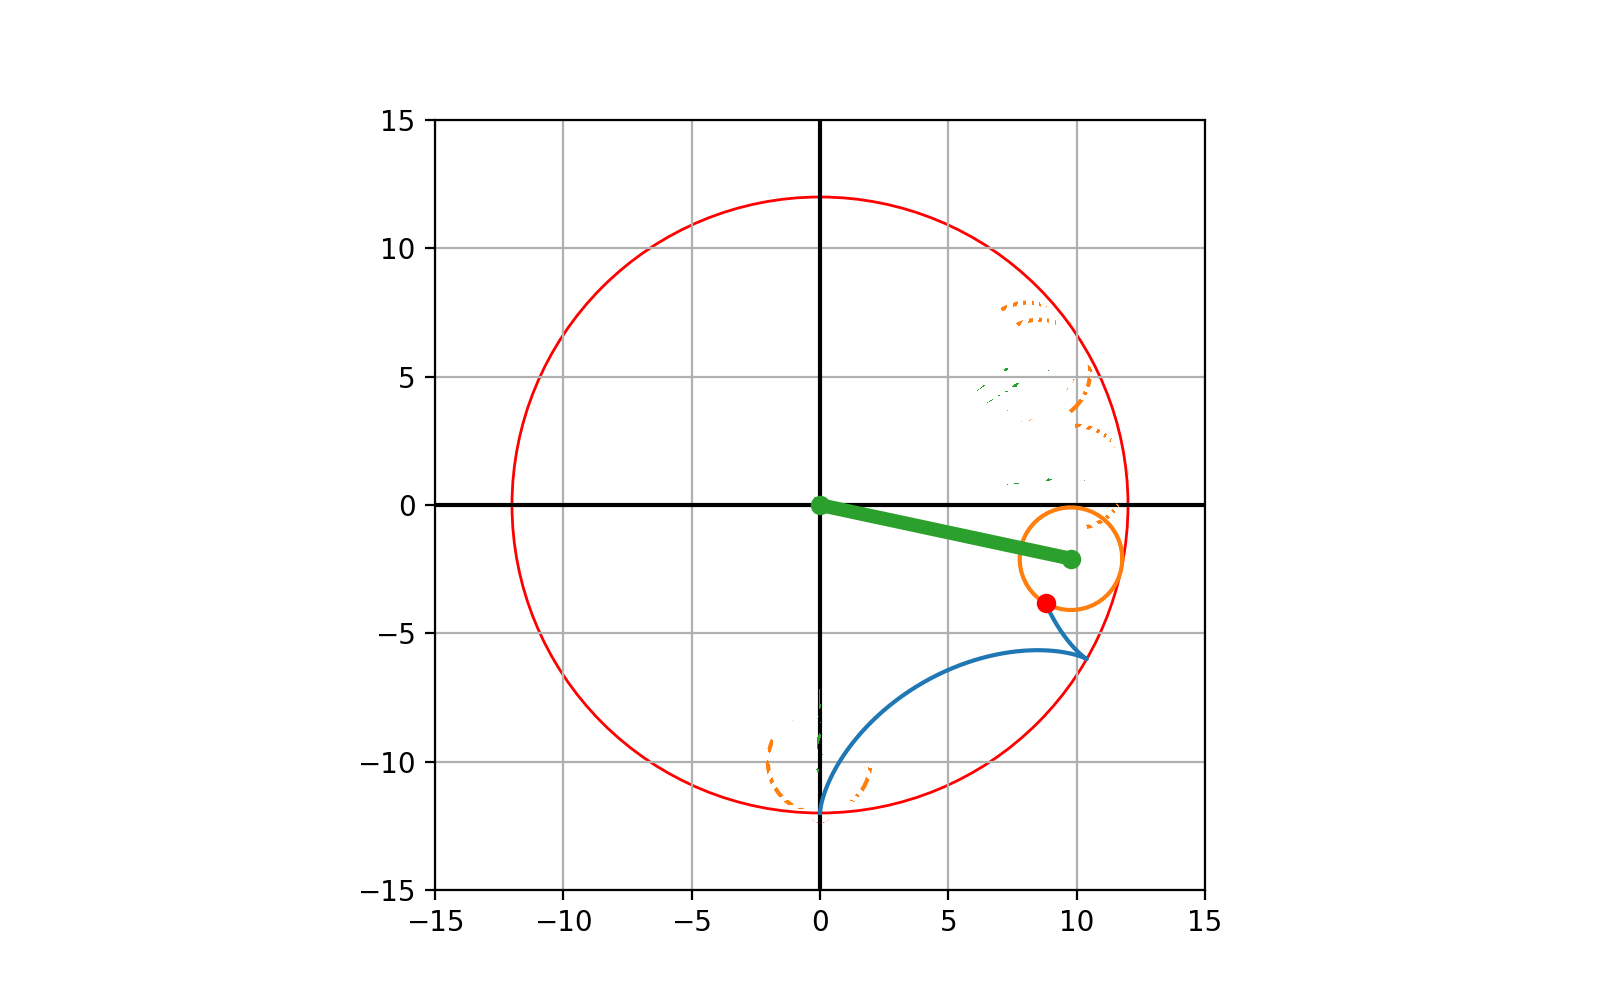

In [18]:
# Ez a cella az animáció próbálgatásához van, hogy ne kelljen mindig a fentit lefuttatni (kicsit kompaktabb így):

fig = plt.figure(figsize=(8,5))

ax = plt.axes()
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
ax.set_aspect('equal')
ax.grid(True)

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

gorbe, = ax.plot([],[])
kiskor, = ax.plot([],[])
potty, = ax.plot([],[],'ro')
kar, = ax.plot([],[],'o-',lw = 5)

# Változtatható paraméterek:
#------------------------
R_dat = 12               # nagy kör sugara
r_dat = 2                # kis kör sugara
ω_dat = 0.04             # kar szögsebessége
α_dat = 1.0             # hányszoros távolságra van (`r`-rel kifejezve) a vizsgált pont a kis kör kp-jától
#------------------------

ani = animation.FuncAnimation(fig, animacio, frames=158, interval=40,fargs=(R_dat,r_dat,ω_dat,α_dat))
circle1 = plt.Circle((0, 0), R_dat, color='r', fill = False) # külső kör: statikus
ax.add_artist(circle1)

plt.show()

In [30]:
# Ha szükség van rá, ki lehet menteni az animációt amennyiben rendelkezésre áll az `FFMpeg` kiegészítő.
# A mentési útvonalat természetesen érdemes módosítani:)
f = r"/Users/domonkoscsuzdi/animation.mov" 
writervideo = animation.FFMpegWriter(fps=30) 
ani.save(f, writer=writervideo)

Az eddig meg nem nevezett "görbe" egy hipociklois. Hasonló ahhoz, ami az első alkalommal volt, de jelen esetben ezt egy körön gördülő kör generálja (ha a külső felületen gördül, akkor epiciklois a neve). A fajtái is hasonlóak, léteznek:
- közönséges hipocikloisok -- a vizsgált pont a gördülő kör kerületén helyeszkedik el;
- nyújtott hiopcikloisok -- a vizsgált pont a körlemezen helyezkedik el;
- hurkolt hipocikloisok -- a vizsgált pont a körlemezen kívül helyezkedik el.

Ezt az $\alpha$ paraméterrel lehet állítani, amely azt határozza meg, hogy a $\mathrm{P}$ pont távolsága a gördülő kör középpontjától a sugarának hányszorosa. 
- $\alpha < 1$ : nyújtott hipociklois; 
- $\alpha = 1$ : közönséges (vagy csúcsos) hipociklois; 
- $\alpha > 1$: hurkolt hipociklois.


Készítette: Csuzdi Domonkos (BME GPK Alkalmazott Mechanika Szakosztály) 2020.

Észrevételek: amsz.bme@gmail.com vagy domonkos@csuzdi.hu